<a href="https://colab.research.google.com/github/JesShiru/ML/blob/main/5G_ENERGY_CONSUMPTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install ydata-profiling
from ydata_profiling import ProfileReport

#Dataset
 '5G-Energy consumption' dataset that was provided by the  international telecommunication union (ITU) in 2023 as part of a global challenge or competition for data scientists all over the world to solve the 5G energy consumption modelling using machine learning techniques.

 Dataset description : This dataset is derived from the original copy and simplified for learning purposes. It includes cell-level traffic statistics of 4G/5G sites collected on different days.

 https://i.imgur.com/Agu9zeP.jpg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GOMYCODE/5G_energy_consumption_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


#Generating a Report

In [ ]:
#generating a report to gain insights from the data
report = ProfileReport(df, title='5G Energy Consumption Report')
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#Cleaning the Data

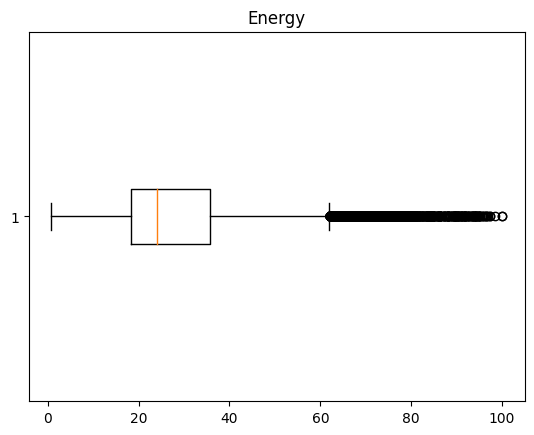

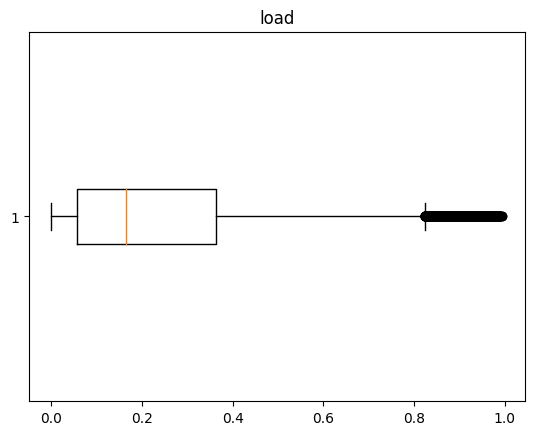

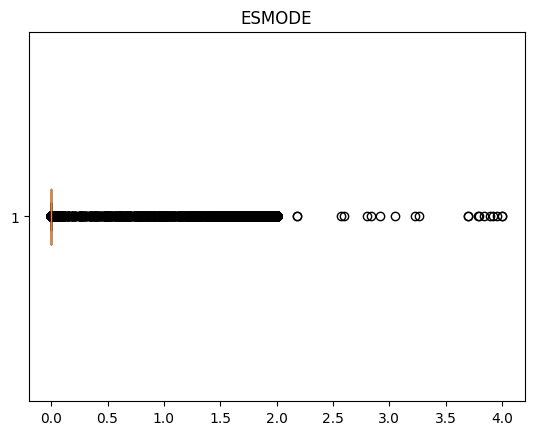

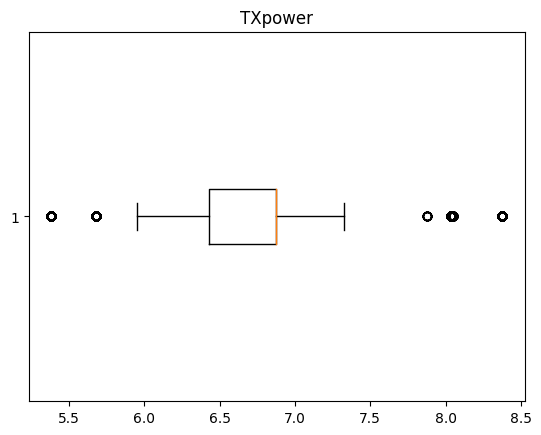

In [ ]:
#checking for outliers
#

#Get column names as a list
column_list = df.columns.tolist()

numerical_columns = column_list[-4:]

for label in numerical_columns:
  plt.boxplot(df[label], vert=False )
  plt.title(label)
  plt.show()


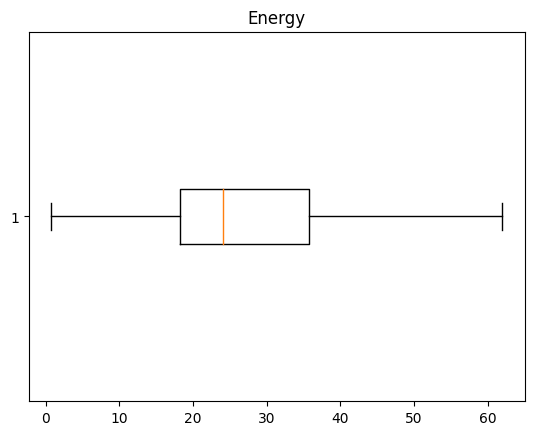

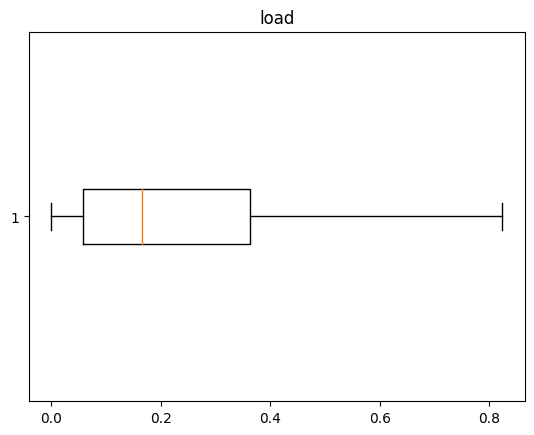

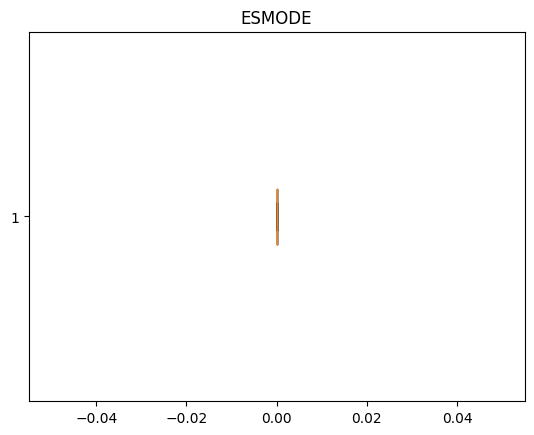

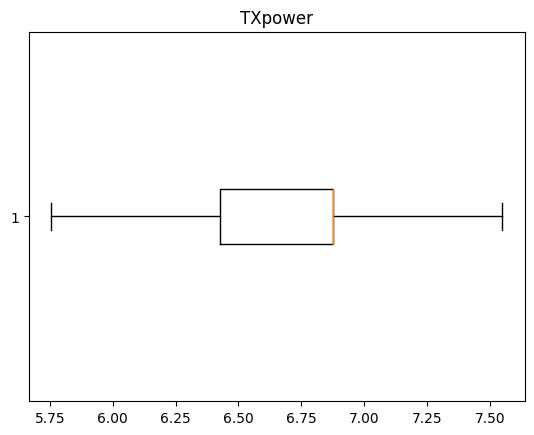

In [ ]:
#cleaning the dataset
#
#dealing with outliers
def handle_outliers(df, numerical_columns):
    Q1 = df[numerical_columns].quantile(0.25)
    Q3 = df[numerical_columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[numerical_columns] = np.where(df[numerical_columns] < lower_bound, lower_bound, df[numerical_columns])
    df[numerical_columns] = np.where(df[numerical_columns] > upper_bound, upper_bound, df[numerical_columns])
    return df

handle_outliers(df, numerical_columns)

#plotting boxplots after dealing with outliers
for label in numerical_columns:
  plt.boxplot(df[label], vert=False )
  plt.title(label)
  plt.show()

In [ ]:
#encoding the 'Time' and 'BS' columns
#
# Display information about the categorical columns
print("Unique values in 'Time' column:", df['Time'].nunique())
print("Sample values from 'Time' column:")
print(df['Time'].head())
print()

print("Unique values in 'BS' column:", df['BS'].nunique())
print("Sample values from 'BS' column:")
print(df['BS'].value_counts().head())
print()

print("Data types:")
print(df[['Time', 'BS']].dtypes)

Unique values in 'Time' column: 168
Sample values from 'Time' column:
0    20230101 010000
1    20230101 020000
2    20230101 030000
3    20230101 040000
4    20230101 050000
Name: Time, dtype: object

Unique values in 'BS' column: 923
Sample values from 'BS' column:
BS
B_583    130
B_261    128
B_728    128
B_669    128
B_512    126
Name: count, dtype: int64

Data types:
Time    object
BS      object
dtype: object


In [ ]:
#encoding the 'BS' column using Target Encoder

!pip install category_encoders

import category_encoders as ce

encoder = ce.TargetEncoder(cols=['BS'])
df['BS_target_encoded'] = encoder.fit_transform(df['BS'], df['Energy'])


In [ ]:
#encoding the 'Time column

#converting the string to datetime
df['Time'] = pd.to_datetime(df['Time'])

#extracting the date
df['Date'] = df['Time'].dt.date
df['Hour'] = df['Time'].dt.hour
df['Day'] = df['Time'].dt.dayofweek
df['IsWeekend'] = df['Time'].dt.dayofweek.isin([5, 6]).astype(int)
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month


#encoding Month - cyclic over 12 months
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

#encoding Day of the Week - cyclic over 7 days
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 7)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 7)

#encoding Hour - cyclic over 24 hours
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

#encoding Year - assuming years are cyclic within a certain period of 20 years
df['Year_sin'] = np.sin(2 * np.pi * (df['Year'] % 10) / 10)
df['Year_cos'] = np.cos(2 * np.pi * (df['Year'] % 10) / 10)


df.head()

,Time,BS,Energy,load,ESMODE,TXpower,BS_target_encoded,Date,Hour,Day,...,Year,Month,Month_sin,Month_cos,Day_sin,Day_cos,Hour_sin,Hour_cos,Year_sin,Year_cos
0,2023-01-01 01:00:00,B_0,61.958146,0.487936,0.0,7.101719,60.976252,2023-01-01,1,6,...,2023,1,0.5,0.866025,-0.781831,0.62349,0.258819,0.965926,0.951057,-0.309017
1,2023-01-01 02:00:00,B_0,55.904335,0.344468,0.0,7.101719,60.976252,2023-01-01,2,6,...,2023,1,0.5,0.866025,-0.781831,0.62349,0.500000,0.866025,0.951057,-0.309017
2,2023-01-01 03:00:00,B_0,57.698057,0.193766,0.0,7.101719,60.976252,2023-01-01,3,6,...,2023,1,0.5,0.866025,-0.781831,0.62349,0.707107,0.707107,0.951057,-0.309017
3,2023-01-01 04:00:00,B_0,55.156951,0.222383,0.0,7.101719,60.976252,2023-01-01,4,6,...,2023,1,0.5,0.866025,-0.781831,0.62349,0.866025,0.500000,0.951057,-0.309017
4,2023-01-01 05:00:00,B_0,56.053812,0.175436,0.0,7.101719,60.976252,2023-01-01,5,6,...,2023,1,0.5,0.866025,-0.781831,0.62349,0.965926,0.258819,0.951057,-0.309017


#Feature Selection and Model Training

In [ ]:
#selectiing the features and the target variable
#dropping the Time and Energy column
x = df.drop(columns=['Energy', 'Time','BS','Date']) #features
y = df['Energy']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Normalizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
from sklearn.linear_model import Lasso

#Initialize Lasso model with alpha (regularization strength)
lasso = Lasso(alpha=0.1)

#Fit the model
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.1)

In [ ]:
#Predict for train and test sets
y_train_pred = lasso.predict(x_train_scaled)
y_test_pred = lasso.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate train and test performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

Train MSE: 13.052702409754621, Test MSE: 13.351400653335972
Train R²: 0.9271448814753144, Test R²: 0.9240114017481846


In [ ]:
max_value = df['Energy'].max()
min_value = df['Energy'].min()

range = max_value - min_value
print(range)

61.210762335
